In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
column_name=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']
mpg=pd.read_csv('auto-mpg.data',names=column_name,na_values='?',comment='\t',sep=' ',skipinitialspace=True)

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
df=pd.DataFrame(data=mpg)
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


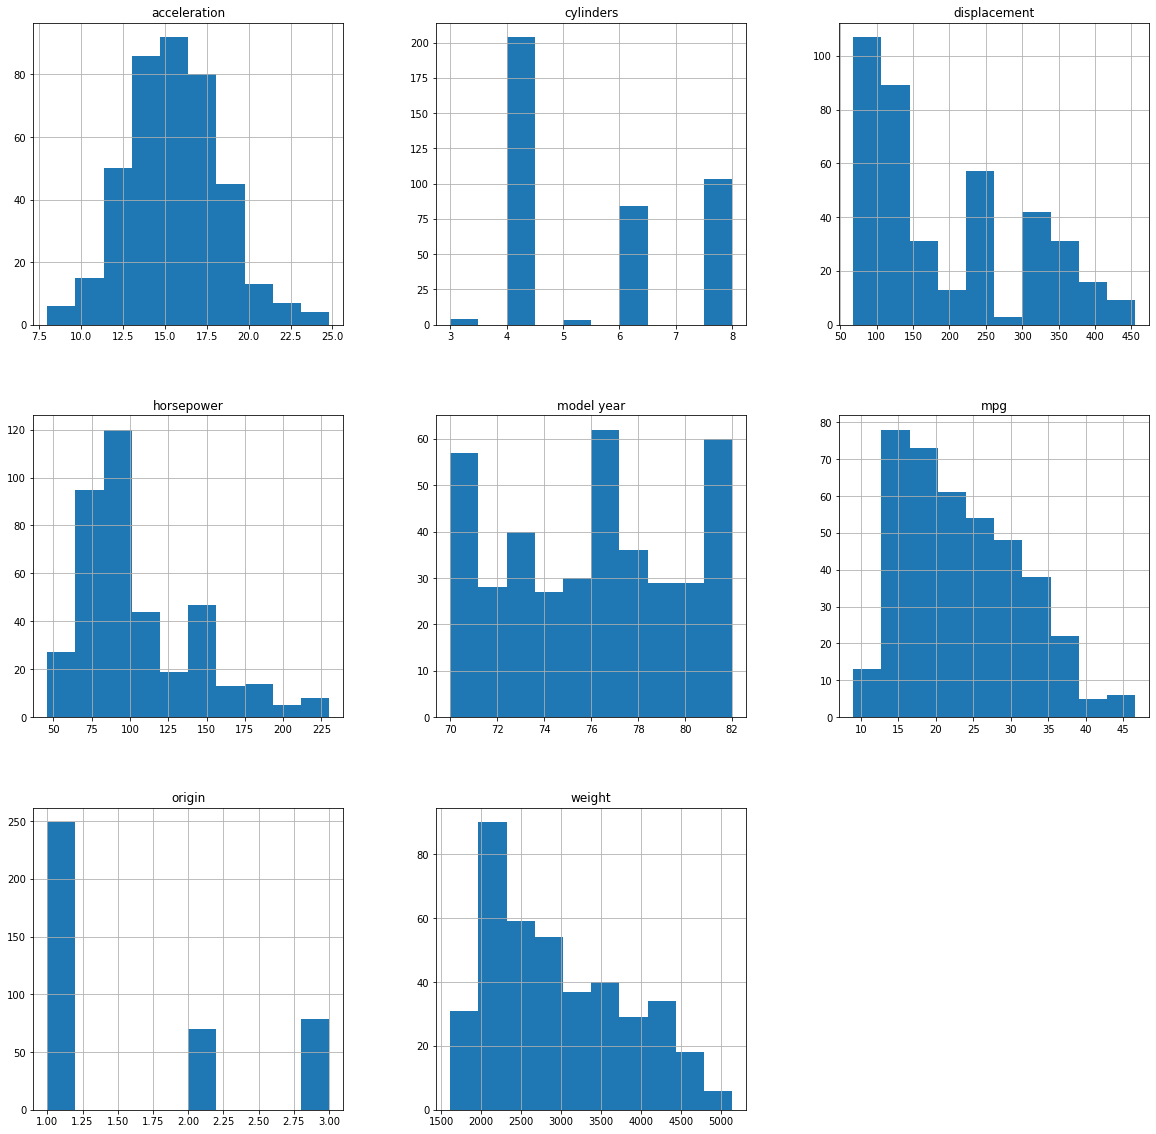

In [5]:
df.hist(figsize=(20,20))
plt.show()

In [6]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['cylinders', 'model year', 'origin'], dtype='object'),
 dtype('float64'): Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')}

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea4dd3aa48>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea4dd419c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea4dd34fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea4dd45948>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea4dd45f08>],
 'means': []}

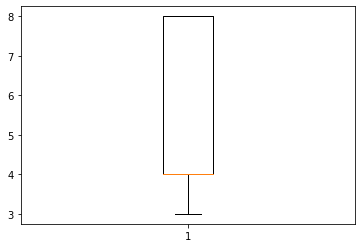

In [7]:
plt.boxplot(df['cylinders'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6f20c4f08>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6f20c8bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6f20c4d48>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6f20cdb48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6f20d1bc8>],
 'means': []}

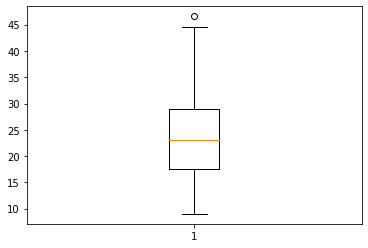

In [9]:
plt.boxplot(df['mpg'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6f1ece988>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6f2136948>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6f2130848>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6f21398c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6f2139f08>],
 'means': []}

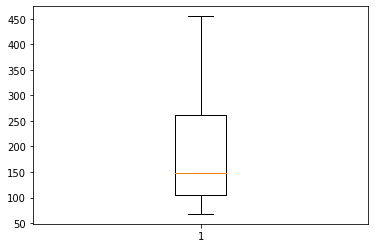

In [10]:
plt.boxplot(df['displacement'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e6f21a63c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e6f21a6a88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e6f21a19c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e6f21aba08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e6f21afbc8>],
 'means': []}

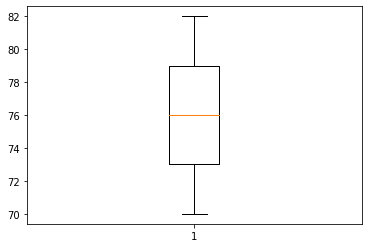

In [11]:
plt.boxplot(df['model year'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e6f2209448>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e6f21d9f48>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e6f2209cc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e6f2209288>}

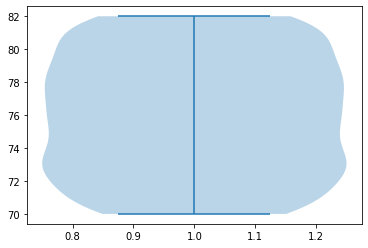

In [12]:
plt.violinplot(df['model year'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e6f227e4c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e6f2256208>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e6f2285188>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e6f2285708>}

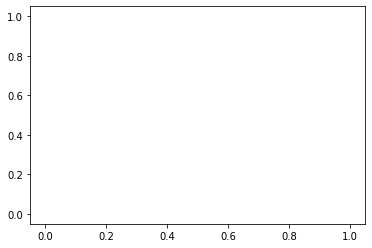

In [13]:
plt.violinplot(df['horsepower'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e6f22e8fc8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e6f21d9b88>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e6f22f0f48>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e6f22f0e48>}

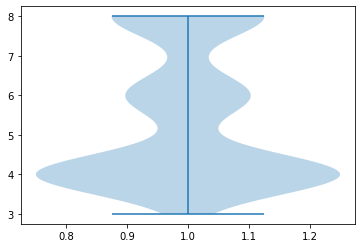

In [14]:
plt.violinplot(df['cylinders'])

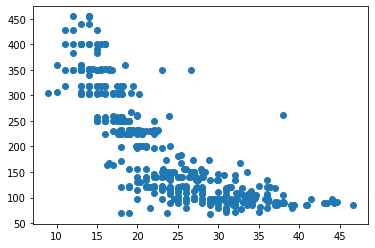

In [15]:
plt.scatter('mpg','displacement',data=df)

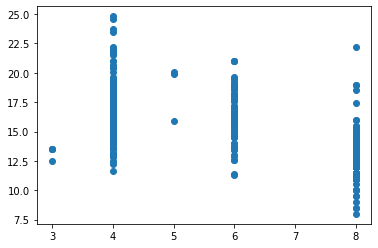

In [16]:
plt.scatter('cylinders','acceleration',data=df)

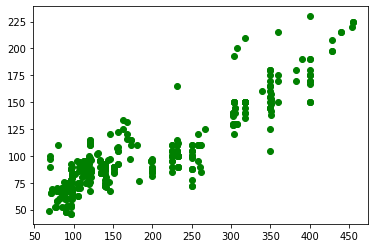

In [19]:
plt.scatter('displacement','horsepower',c='g',data=df)

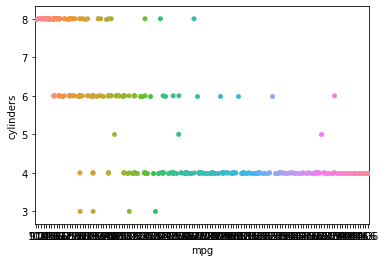

In [20]:
sns.stripplot('mpg','cylinders',data=df)

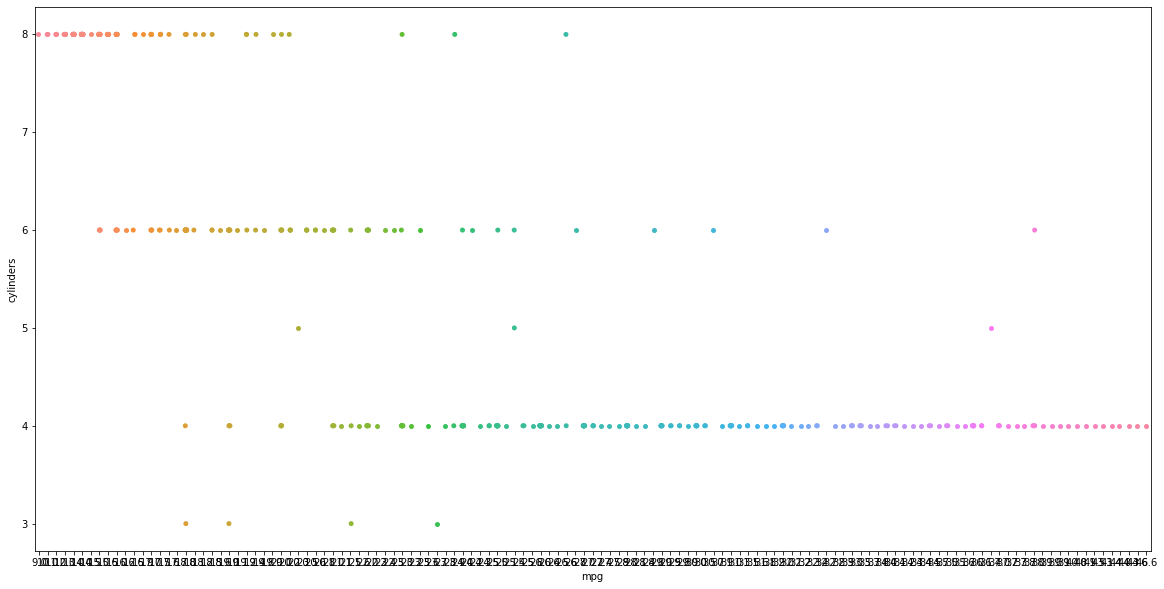

In [25]:
plt.figure(figsize=(20,10))
sns.stripplot('mpg','cylinders',data=df)

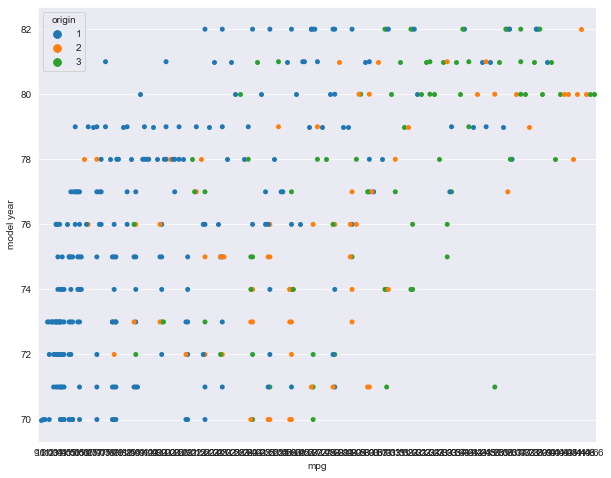

In [27]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.swarmplot('mpg','model year',hue='origin',data=df,)

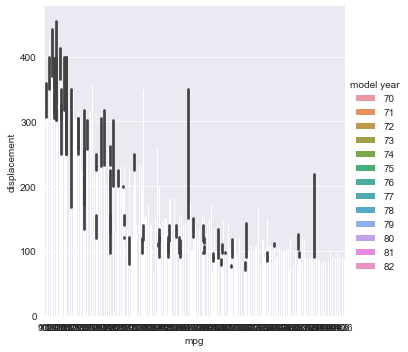

In [29]:
sns.catplot('mpg','displacement',hue='model year',data=df,kind='bar')

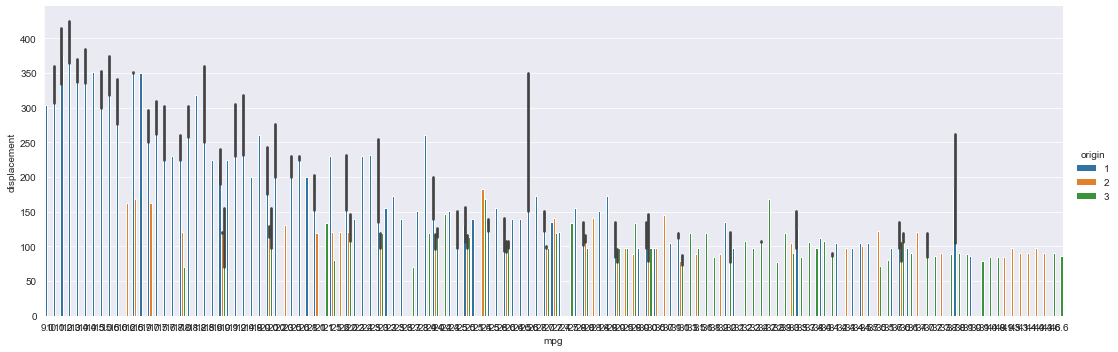

In [30]:
sns.catplot('mpg','displacement',hue='origin',height=5,aspect=3,data=df,kind='bar')

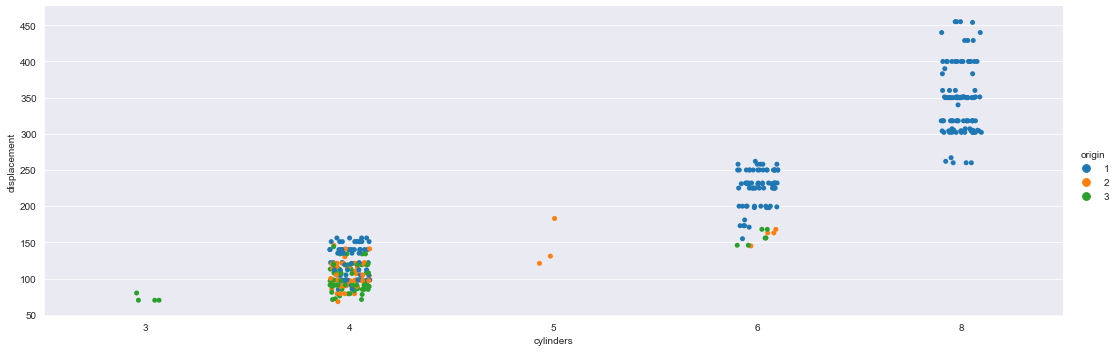

In [31]:
sns.catplot('cylinders','displacement',hue='origin',height=5,aspect=3,data=df,kind='strip')

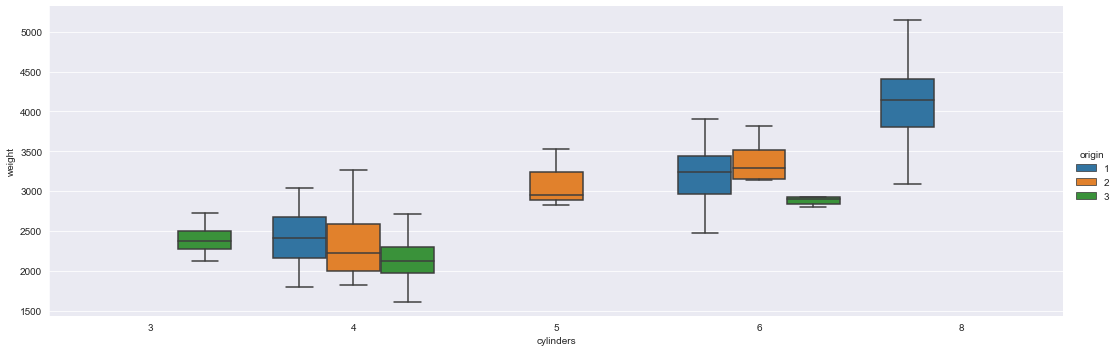

In [32]:
sns.catplot('cylinders','weight',hue='origin',height=5,aspect=3,data=df,kind='box')

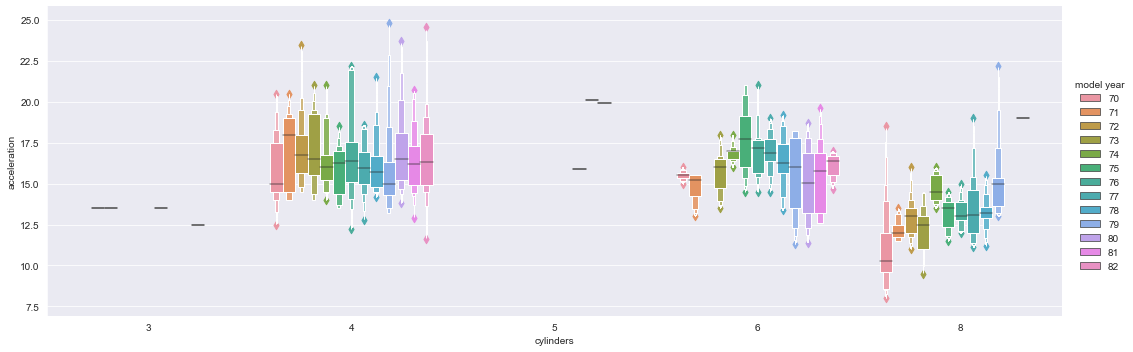

In [33]:
sns.catplot('cylinders','acceleration',hue='model year',height=5,aspect=3,data=df,kind='boxen')

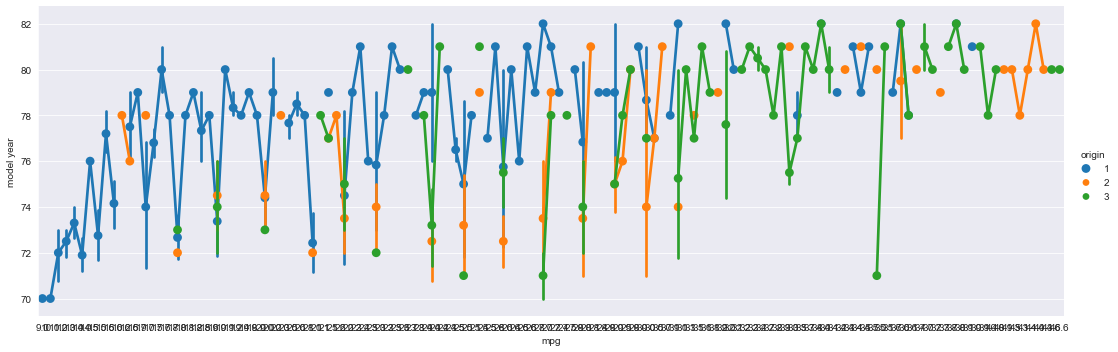

In [34]:
sns.catplot('mpg','model year',hue='origin',height=5,aspect=3,data=df,kind='point')

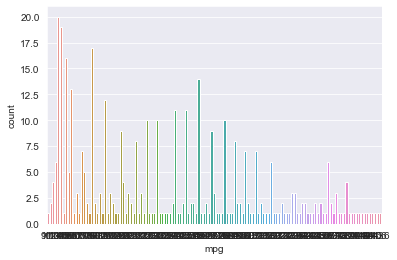

In [35]:
sns.countplot(df['mpg'])

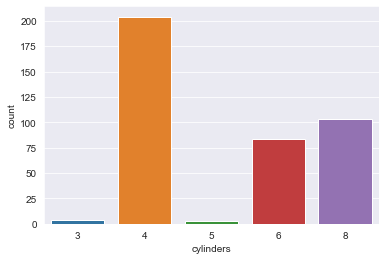

In [36]:
sns.countplot(df['cylinders'])

In [37]:
df['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

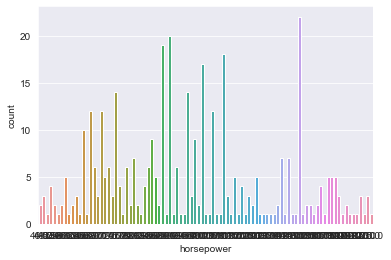

In [38]:
sns.countplot(df['horsepower'])

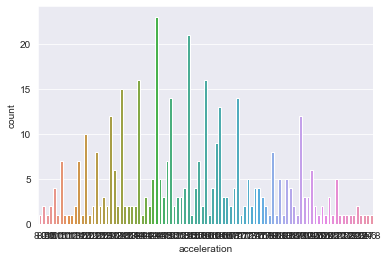

In [39]:
sns.countplot(df['acceleration'])

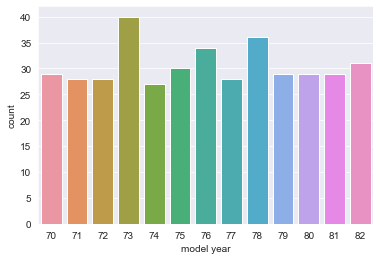

In [40]:
sns.countplot(df['model year'])

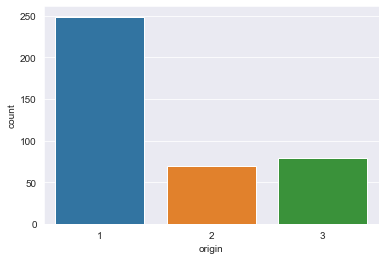

In [41]:
sns.countplot(df['origin'])

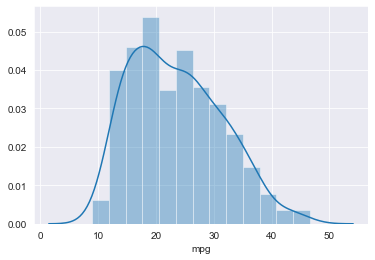

In [42]:
sns.distplot(df['mpg'])

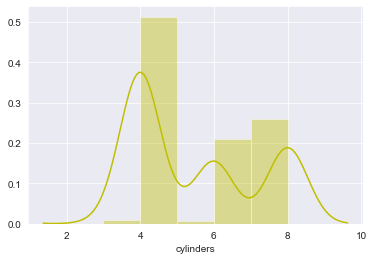

In [43]:
sns.distplot(df['cylinders'],color='y')

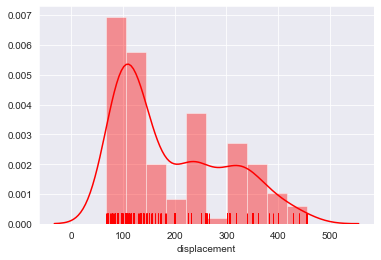

In [44]:
sns.distplot(df['displacement'],color='r',rug=True)

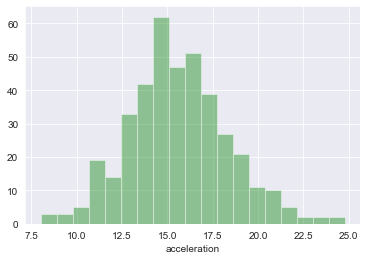

In [46]:
sns.distplot(df['acceleration'],color='g',kde=False)

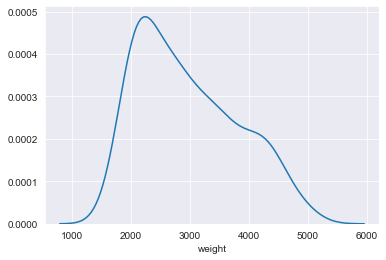

In [48]:
sns.distplot(df['weight'],bins=10,hist=False)

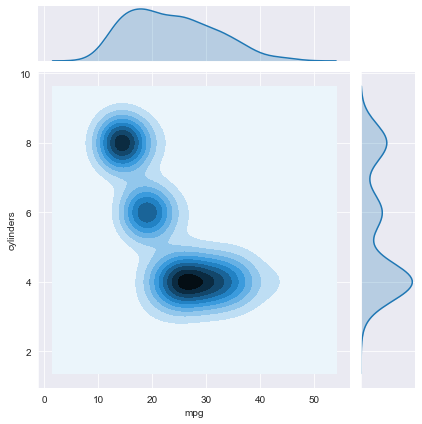

In [49]:
sns.jointplot('mpg','cylinders',data=df,kind='kde')

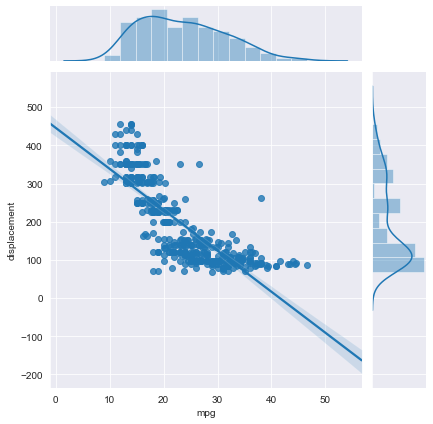

In [50]:
sns.jointplot('mpg','displacement',height=6,ratio=5,space=0.2,data=df,kind='reg')

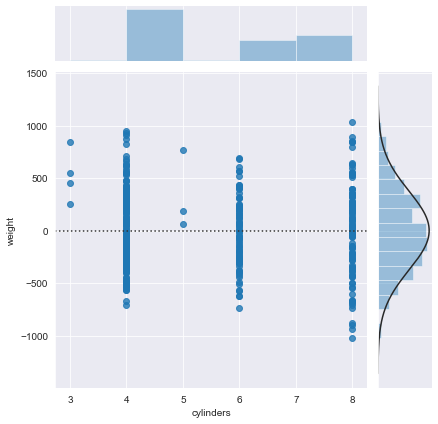

In [51]:
sns.jointplot('cylinders','weight',height=6,ratio=5,space=0.2,data=df,kind='resid')

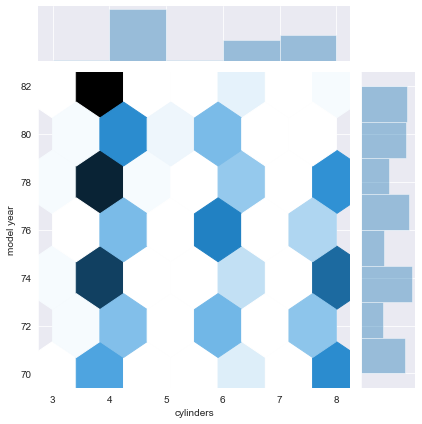

In [53]:
sns.jointplot('cylinders','model year',height=6,ratio=5,space=0.2,data=df,kind='hex')

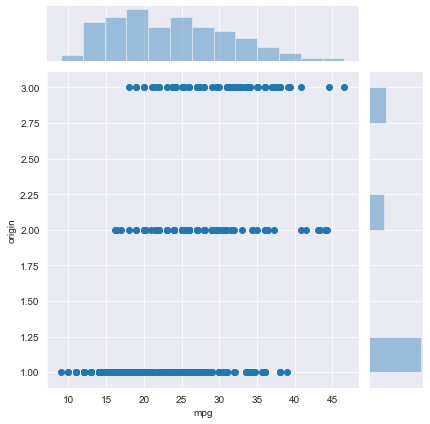

In [54]:
sns.jointplot('mpg','origin',height=6,ratio=5,space=0.2,data=df,kind='scatter')

In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [10]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [11]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [12]:
df.shape

(398, 8)

In [13]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

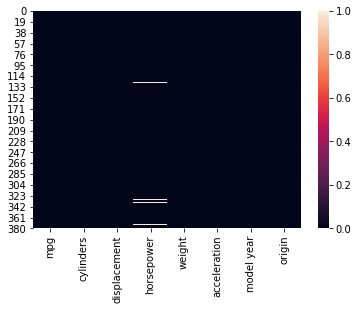

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.dropna(axis=0,how='any',inplace=True)

In [16]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['cylinders', 'model year', 'origin'], dtype='object'),
 dtype('float64'): Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')}

In [17]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [18]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

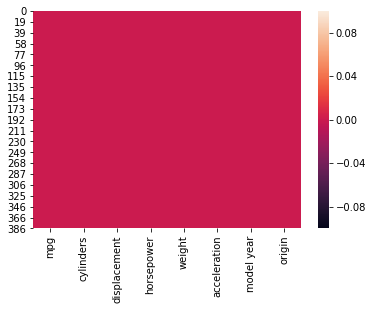

In [19]:
sns.heatmap(df.isnull())

In [20]:
df.shape

(392, 8)

In [21]:
df.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.915185
dtype: float64

mpg                 AxesSubplot(0.125,0.71587;0.133621x0.16413)
cylinders        AxesSubplot(0.285345,0.71587;0.133621x0.16413)
displacement      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
horsepower       AxesSubplot(0.606034,0.71587;0.133621x0.16413)
weight           AxesSubplot(0.766379,0.71587;0.133621x0.16413)
acceleration       AxesSubplot(0.125,0.518913;0.133621x0.16413)
model year      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
origin           AxesSubplot(0.44569,0.518913;0.133621x0.16413)
dtype: object

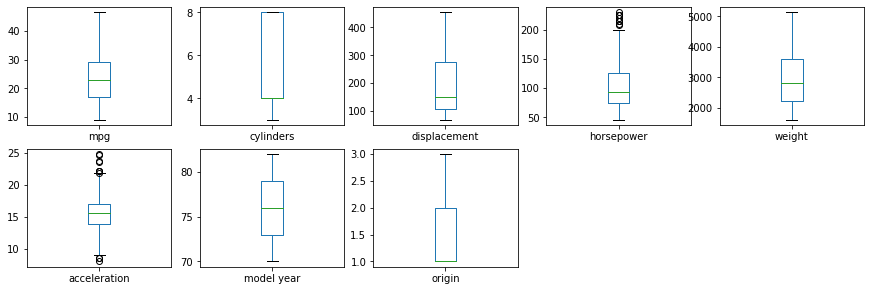

In [22]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

In [23]:
zscore(df)

array([[-0.69863841,  1.48394702,  1.07728956, ..., -1.285258  ,
        -1.62531533, -0.71664105],
       [-1.08349824,  1.48394702,  1.48873169, ..., -1.46672362,
        -1.62531533, -0.71664105],
       [-0.69863841,  1.48394702,  1.1825422 , ..., -1.64818924,
        -1.62531533, -0.71664105],
       ...,
       [ 1.09737414, -0.86401356, -0.56847897, ..., -1.4304305 ,
         1.63640964, -0.71664105],
       [ 0.5842277 , -0.86401356, -0.7120053 , ...,  1.11008813,
         1.63640964, -0.71664105],
       [ 0.96908753, -0.86401356, -0.72157372, ...,  1.40043312,
         1.63640964, -0.71664105]])

In [24]:
z=np.abs(zscore(df))
print(z)

[[0.69863841 1.48394702 1.07728956 ... 1.285258   1.62531533 0.71664105]
 [1.08349824 1.48394702 1.48873169 ... 1.46672362 1.62531533 0.71664105]
 [0.69863841 1.48394702 1.1825422  ... 1.64818924 1.62531533 0.71664105]
 ...
 [1.09737414 0.86401356 0.56847897 ... 1.4304305  1.63640964 0.71664105]
 [0.5842277  0.86401356 0.7120053  ... 1.11008813 1.63640964 0.71664105]
 [0.96908753 0.86401356 0.72157372 ... 1.40043312 1.63640964 0.71664105]]


In [25]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([  0,   0,   0, ..., 391, 391, 391], dtype=int64), array([0, 1, 2, ..., 5, 6, 7], dtype=int64))
(392, 8)


In [26]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

In [27]:
Q1

mpg               17.000
cylinders          4.000
displacement     105.000
horsepower        75.000
weight          2225.250
acceleration      13.775
model year        73.000
origin             1.000
Name: 0.25, dtype: float64

In [28]:
Q3

mpg               29.000
cylinders          8.000
displacement     275.750
horsepower       126.000
weight          3614.750
acceleration      17.025
model year        79.000
origin             2.000
Name: 0.75, dtype: float64

In [29]:
IQR=Q3-Q1
IQR

mpg               12.00
cylinders          4.00
displacement     170.75
horsepower        51.00
weight          1389.50
acceleration       3.25
model year         6.00
origin             1.00
dtype: float64

In [30]:
df_new=df[(z<3).all(axis=1)]

In [31]:
print(df.shape)
print(df_new.shape)

(392, 8)
(385, 8)


In [32]:
df=df_new
print(df.shape)

(385, 8)


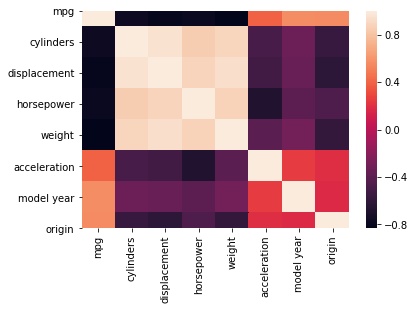

In [33]:
sns.heatmap(df.corr())

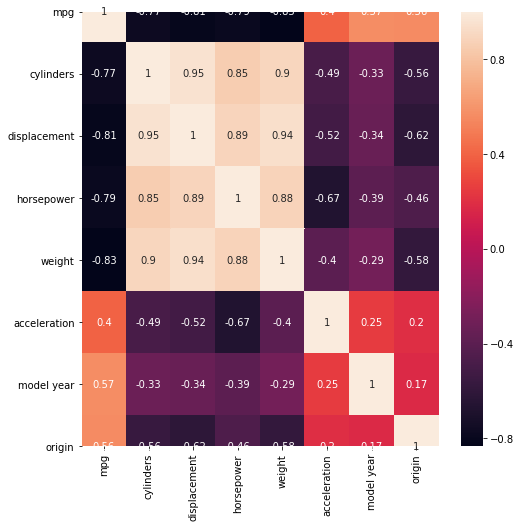

In [34]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

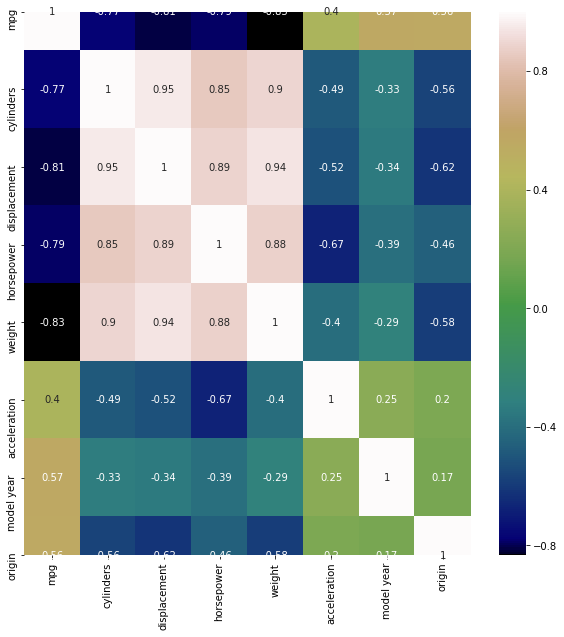

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='gist_earth',annot=True)

In [36]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [37]:
x=df.iloc[:,0:-1]
x.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [38]:
y=df['origin']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: origin, dtype: int64

In [39]:
models=[LogisticRegression(),KNeighborsRegressor(),DecisionTreeRegressor()]

In [40]:
max_r2_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        r2_value=r2_score(y_test,predm)
        print('R2 score correspond to random state',r_state ,'is',r2_value)
        if r2_value>max_r2_score:
            max_r2_score=r2_value
            final_state=r_state
            final_model=m
print()
print()
print()
print('Maximum R2 score correspond to random state',final_state,'is',max_r2_score,'and models is',final_model)

R2 score correspond to random state 40 is 0.34990439770554516
R2 score correspond to random state 40 is 0.40191204588910157
R2 score correspond to random state 40 is 0.715583173996176
R2 score correspond to random state 41 is -0.08755644756648251
R2 score correspond to random state 41 is 0.2220772704465631
R2 score correspond to random state 41 is 0.48820873055694936
R2 score correspond to random state 42 is 0.3096034400382224
R2 score correspond to random state 42 is 0.0838031533683703
R2 score correspond to random state 42 is 0.5126612517916864
R2 score correspond to random state 43 is 0.3583042973286875
R2 score correspond to random state 43 is 0.5017808749516066
R2 score correspond to random state 43 is 0.6544715447154472
R2 score correspond to random state 44 is -0.25956022944550616
R2 score correspond to random state 44 is 0.17600382409177862
R2 score correspond to random state 44 is -0.07672084130019075
R2 score correspond to random state 45 is -0.171875
R2 score correspond to r

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=48)

In [46]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
predtr=dtr.predict(x_test)
print('R2 Score:',r2_score(y_test,predtr))
print(mean_squared_error(y_test,predtr))
print(mean_absolute_error(y_test,predtr))
print(np.sqrt(mean_absolute_error(y_test,predtr)))

R2 Score: 0.7449635662237463
0.16470588235294117
0.1411764705882353
0.37573457465108967


In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
parameter={'criterion':('mse','friedman_mse'),'splitter':('best','random')}
dtr=DecisionTreeRegressor()
grid=GridSearchCV(dtr,parameter)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('mse', 'friedman_mse'),
                         'splitter': ('best', 'random')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
          

In [47]:
dtr=DecisionTreeRegressor(criterion='mse',splitter='best')
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
predtr=dtr.predict(x_test)
print('R2 Score:',r2_score(y_test,predtr))
print(mean_squared_error(y_test,predtr))
print(mean_absolute_error(y_test,predtr))
print(np.sqrt(mean_absolute_error(y_test,predtr)))

R2 Score: 0.7631804543506215
0.15294117647058825
0.12941176470588237
0.3597384670922507


In [48]:
scale=cross_val_score(dtr,x,y,cv=5)
print(scale)
print(scale.mean())
print(scale.std())

[-0.22407267  0.7347876   0.22418136  0.08333333 -0.03111461]
0.15742300194481623
0.32384601844283206


Text(0, 0.5, 'Predicted origin vlaue')

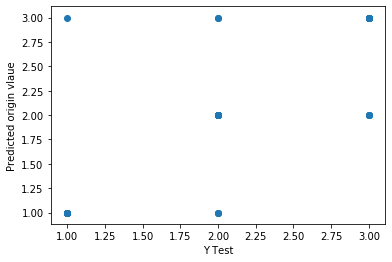

In [49]:
plt.scatter(y_test,predtr)
plt.xlabel('Y Test')
plt.ylabel('Predicted origin vlaue')

In [50]:
from sklearn.externals import joblib

In [51]:
joblib.dump(dtr,'MPGFile.obj')

['MPGFile.obj']